![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# TFM - Clustering

# *1. Librerías*

In [ ]:
# Principales librerias
import pandas as pd
import numpy as np

# Visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configuración de las visualizaciones
pd.set_option('display.max_info_columns', 110 )
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)

# *2. Carga de datos*

In [4]:
# Cargar el dataset para utilizar en clustering
df = pd.read_csv("./data/dfClustering1.csv", sep=';', index_col=False, low_memory=False)

In [2]:
# Cargar el dataset para utilizar en clustering
df_original = pd.read_csv("./data/dfClustering1.csv", sep=';', index_col=False, low_memory=False)

# *3. Exploración de datos*

In [5]:
print(f"El DataFrame 'df' tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame 'df' tiene 9864 filas y 72 columnas.


In [6]:
df.head(2)

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency
0,104.00,Villa De Vallecas,18,Santa Eugenia,182,0,Piso,3,0.00,3.00,4,1,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28031,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,23876,139,2,1,5,0,1,158,17346,2.61,12370,27,11,0,0,0,0,0,2681389,0,0,0,1,1,329900,234038.64,249993.47,2749.72,164,5,20.80,1,4.00,0,44
1,144.00,Salamanca,4,Goya,42,4,Piso,0,1.00,2.00,2,2,0,0,0,1,mas_50,0,lujo,0,0,1,0,0,0,1,28001,Desconocido,1,0,0,0,0,Normal,Desconocido,0,4,29477,478,4,6,18,0,1,186,38751,2.28,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1354900,1454144.60,1752995.20,10005.31,205,4,36.00,1,8.00,7681,338


In [7]:
df.columns

Index(['m2_constr', 'distrito', 'cod_distrito', 'barrio', 'cod_barrio',
       'letra_ce', 'tipologia', 'estado', 'amueblado', 'planta', 'dormitorios',
       'banos', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad',
       'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior',
       'piscina', 'porton_electrico', 'videoportero', 'armarios',
       'codigo_postal', 'tipo_suelo', 'certificado_energetico',
       'puerta_seguridad', 'orientacion_este', 'orientacion_oeste',
       'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte',
       'letra_emisiones', 'num_personas', 'total_transacciones',
       'viv_nuevas_transacciones', 'lineas_metro', 'salidas_metro',
       'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
       'renta_bruta_media_por_persona', 'tamano_medio_del_hogar', 'tam_hogar',
       'hog_con_10', 'hog_con_15_y_más', 'comercio_serviciosminoristas',
       'hosteleria_restauracion', 'salud_bienestar_educacion',
  

In [8]:
# Verificar valores nulos por columna
valores_nulos = df.isnull().sum().sort_values(ascending=False)

print(f"El DataFrame 'df' tiene los siguientes valores nulos por columna:\n{valores_nulos}.")

El DataFrame 'df' tiene los siguientes valores nulos por columna:
ins_comunitaria                  0
energia                          0
eficiencia_carpinteria           0
num_garajes                      0
cod_barrio_group                 0
target                           0
precio_mean_b                    0
pm_tlogia_distrito               0
amueblado                        0
planta                           0
dormitorios                      0
banos                            0
balcon                           0
terraza                          0
trastero                         0
ascensor                         0
antiguedad                       0
jardin                           0
tipo_inmueble                    0
cancha_tenis                     0
chimenea                         0
exterior                         0
piscina                          0
porton_electrico                 0
videoportero                     0
armarios                         0
codigo_postal           

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
m2_constr,9864.00,NaN,NaN,NaN,138.75,152.77,10.00,68.00,98.00,150.00,4574.00
distrito,9864,21,Centro,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_distrito,9864.00,NaN,NaN,NaN,7.82,5.75,1.00,4.00,6.00,12.00,21.00
barrio,9864,131,Goya,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_barrio,9864.00,NaN,NaN,NaN,81.89,57.61,11.00,41.00,66.00,124.00,215.00
letra_ce,9864.00,NaN,NaN,NaN,0.65,1.41,0.00,0.00,0.00,0.00,7.00
tipologia,9864,6,Piso,8610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado,9864.00,NaN,NaN,NaN,1.39,1.53,0.00,0.00,1.00,2.00,5.00
amueblado,9864.00,NaN,NaN,NaN,0.10,0.30,0.00,0.00,0.00,0.00,1.00
planta,9864.00,NaN,NaN,NaN,2.57,2.20,-1.00,1.00,2.00,3.00,27.00


## 3.1. Tipos de datos

In [10]:
# Identificar los tipos de datos en el dataset
tipos_de_datos = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      55
float64     9
object      8
Name: count, dtype: int64.


In [11]:
# Obtener lista de columnas que son de tipo object
columnas_object = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar la lista de columnas
print(columnas_object)

['distrito', 'barrio', 'tipologia', 'antiguedad', 'tipo_inmueble', 'tipo_suelo', 'aire', 'grupo_cocina']


In [12]:
# Columnas pendientes de hacer Label Encoding
columnas_object_df = df.select_dtypes(include=['object'])
columnas_object_df.head()

,distrito,barrio,tipologia,antiguedad,tipo_inmueble,tipo_suelo,aire,grupo_cocina
0,Villa De Vallecas,Santa Eugenia,Piso,Desconocido,Desconocido,Desconocido,Normal,Desconocido
1,Salamanca,Goya,Piso,mas_50,lujo,Desconocido,Normal,Desconocido
2,Salamanca,Goya,Piso,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido
3,Retiro,Jerónimos,Piso,mas_50,Desconocido,Madera,Normal,Equipada
4,San Blas-Canillejas,Simancas,Atico,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido


In [13]:
# Obtener variables que son de tipo float
columnas_float = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float.head()

,m2_constr,amueblado,planta,tamano_medio_del_hogar,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,m2_por_hab,atrib
0,104.00,0.00,3.00,2.61,234038.64,249993.47,2749.72,20.80,4.00
1,144.00,1.00,2.00,2.28,1454144.60,1752995.20,10005.31,36.00,8.00
2,108.00,0.00,8.00,2.28,1454144.60,1752995.20,10005.31,21.60,4.00
3,264.00,1.00,0.00,2.39,2618438.20,1378643.60,12463.88,29.33,6.00
4,208.00,0.00,6.00,2.63,332507.66,691500.00,3150.77,34.67,3.00


In [14]:
# Revisar si amueblado es una variable numérica continua o es booleana/categórica
amueblado_unique = df['amueblado'].unique()
print(amueblado_unique)

[0.  1.  0.1 0.5]


In [15]:
# Obtener variables que son de tipo int
columnas_int = df.select_dtypes(include=['int'])

# Mostrar variables
columnas_int.head()

,cod_distrito,cod_barrio,letra_ce,estado,dormitorios,banos,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,total_estaciones,habitaciones,atrib_lujo,serv_barrio,cod_barrio_frecuency
0,18,182,0,3,4,1,0,0,0,1,0,0,0,2,0,0,0,1,28031,0,0,0,0,0,0,0,23876,139,2,1,5,0,1,158,17346,12370,27,11,0,0,0,0,0,2681389,0,0,0,1,1,329900,164,5,1,0,44
1,4,42,4,0,2,2,0,0,0,1,0,0,0,1,0,0,0,1,28001,1,0,0,0,0,0,4,29477,478,4,6,18,0,1,186,38751,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1354900,205,4,1,7681,338
2,4,42,0,2,3,2,0,0,0,1,0,0,0,2,0,0,0,1,28001,0,0,0,0,0,0,0,29477,478,4,6,18,0,1,186,38751,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1175000,205,5,1,7681,338
3,3,35,0,5,4,5,1,0,0,1,0,0,0,2,0,0,0,1,28014,0,0,1,0,0,0,0,6825,82,0,4,8,0,0,138,33396,16179,10,13,408,160,169,349,164,1427833,0,0,0,1,5,5500000,146,9,1,1250,73
4,20,201,0,2,4,2,0,0,0,1,0,0,0,1,0,0,0,1,28037,0,0,0,0,0,0,0,28765,358,9,3,10,0,0,275,19768,16710,44,26,1504,739,381,828,552,995950,0,0,0,1,3,667000,285,6,1,4004,90


In [16]:
# Transformar variables int a tipo float ya que son numéricas continuas
columnas_a_float = ['dormitorios', 'banos', 'num_personas', 'total_transacciones', 'viv_nuevas_transacciones',
                    'lineas_metro', 'salidas_metro', 'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
                    'renta_bruta_media_por_persona', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más',
                    'comercio_serviciosminoristas', 'hosteleria_restauracion', 'salud_bienestar_educacion',
                    'servicios_profesionales', 'cultura_entretenimiento', 'm2_areasverdes', 'num_garajes', 'target',
                    'total_estaciones', 'habitaciones', 'serv_barrio', 'cod_barrio_frecuency']
df[columnas_a_float] = df[columnas_a_float].astype('float64')

# Obtener variables que son de tipo int
columnas_int_final = df.select_dtypes(include=['int'])

# Mostrar variables
columnas_int_final.head()

,cod_distrito,cod_barrio,letra_ce,estado,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group,atrib_lujo
0,18,182,0,3,0,0,0,1,0,0,0,2,0,0,0,1,28031,0,0,0,0,0,0,0,0,0,0,1,1
1,4,42,4,0,0,0,0,1,0,0,0,1,0,0,0,1,28001,1,0,0,0,0,0,4,0,0,0,5,1
2,4,42,0,2,0,0,0,1,0,0,0,2,0,0,0,1,28001,0,0,0,0,0,0,0,0,0,0,5,1
3,3,35,0,5,1,0,0,1,0,0,0,2,0,0,0,1,28014,0,0,1,0,0,0,0,0,0,0,5,1
4,20,201,0,2,0,0,0,1,0,0,0,1,0,0,0,1,28037,0,0,0,0,0,0,0,0,0,0,3,1


In [17]:
# DATASET ORIGINAL TAMBIÉN: Transformar variables int a tipo float ya que son numéricas continuas
columnas_a_float_dforiginal = ['dormitorios', 'banos', 'num_personas', 'total_transacciones', 'viv_nuevas_transacciones',
                    'lineas_metro', 'salidas_metro', 'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
                    'renta_bruta_media_por_persona', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más',
                    'comercio_serviciosminoristas', 'hosteleria_restauracion', 'salud_bienestar_educacion',
                    'servicios_profesionales', 'cultura_entretenimiento', 'm2_areasverdes', 'num_garajes', 'target',
                    'total_estaciones', 'habitaciones', 'serv_barrio', 'cod_barrio_frecuency']
df_original[columnas_a_float_dforiginal] = df_original[columnas_a_float_dforiginal].astype('float64')

# Obtener variables que son de tipo int
columnas_int_final_dforiginal = df_original.select_dtypes(include=['int'])

# Mostrar variables
columnas_int_final_dforiginal.head()

,cod_distrito,cod_barrio,letra_ce,estado,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group,atrib_lujo
0,18,182,0,3,0,0,0,1,0,0,0,2,0,0,0,1,28031,0,0,0,0,0,0,0,0,0,0,1,1
1,4,42,4,0,0,0,0,1,0,0,0,1,0,0,0,1,28001,1,0,0,0,0,0,4,0,0,0,5,1
2,4,42,0,2,0,0,0,1,0,0,0,2,0,0,0,1,28001,0,0,0,0,0,0,0,0,0,0,5,1
3,3,35,0,5,1,0,0,1,0,0,0,2,0,0,0,1,28014,0,0,1,0,0,0,0,0,0,0,5,1
4,20,201,0,2,0,0,0,1,0,0,0,1,0,0,0,1,28037,0,0,0,0,0,0,0,0,0,0,3,1


In [15]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_2 = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos_2}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
float64    35
int64      29
object      8
Name: count, dtype: int64.


In [18]:
# DATASET ORIGINAL TAMBIÉN: Identificar los tipos de datos en el dataset
tipos_de_datos_dforiginal = df_original.dtypes.value_counts()

print(f"El DataFrame 'df_original' tiene los siguientes tipos de datos:\n{tipos_de_datos_dforiginal}.")

El DataFrame 'df_original' tiene los siguientes tipos de datos:
float64    35
int64      29
object      8
Name: count, dtype: int64.


In [19]:
# Obtener variables que son de tipo float
columnas_float_final = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float_final.head()

,m2_constr,amueblado,planta,dormitorios,banos,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,num_garajes,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib,serv_barrio,cod_barrio_frecuency
0,104.00,0.00,3.00,4.00,1.00,23876.00,139.00,2.00,1.00,5.00,0.00,1.00,158.00,17346.00,2.61,12370.00,27.00,11.00,0.00,0.00,0.00,0.00,0.00,2681389.00,1.00,329900.00,234038.64,249993.47,2749.72,164.00,5.00,20.80,4.00,0.00,44.00
1,144.00,1.00,2.00,2.00,2.00,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,1.00,1354900.00,1454144.60,1752995.20,10005.31,205.00,4.00,36.00,8.00,7681.00,338.00
2,108.00,0.00,8.00,3.00,2.00,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,1.00,1175000.00,1454144.60,1752995.20,10005.31,205.00,5.00,21.60,4.00,7681.00,338.00
3,264.00,1.00,0.00,4.00,5.00,6825.00,82.00,0.00,4.00,8.00,0.00,0.00,138.00,33396.00,2.39,16179.00,10.00,13.00,408.00,160.00,169.00,349.00,164.00,1427833.00,1.00,5500000.00,2618438.20,1378643.60,12463.88,146.00,9.00,29.33,6.00,1250.00,73.00
4,208.00,0.00,6.00,4.00,2.00,28765.00,358.00,9.00,3.00,10.00,0.00,0.00,275.00,19768.00,2.63,16710.00,44.00,26.00,1504.00,739.00,381.00,828.00,552.00,995950.00,1.00,667000.00,332507.66,691500.00,3150.77,285.00,6.00,34.67,3.00,4004.00,90.00


In [20]:
# Mostrar el DataFrame para comparación posterior
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency
0,104.00,Villa De Vallecas,18,Santa Eugenia,182,0,Piso,3,0.00,3.00,4.00,1.00,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28031,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,23876.00,139.00,2.00,1.00,5.00,0.00,1.00,158.00,17346.00,2.61,12370.00,27.00,11.00,0.00,0.00,0.00,0.00,0.00,2681389.00,0,0,0,1.00,1,329900.00,234038.64,249993.47,2749.72,164.00,5.00,20.80,1,4.00,0.00,44.00
1,144.00,Salamanca,4,Goya,42,4,Piso,0,1.00,2.00,2.00,2.00,0,0,0,1,mas_50,0,lujo,0,0,1,0,0,0,1,28001,Desconocido,1,0,0,0,0,Normal,Desconocido,0,4,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1354900.00,1454144.60,1752995.20,10005.31,205.00,4.00,36.00,1,8.00,7681.00,338.00
2,108.00,Salamanca,4,Goya,42,0,Piso,2,0.00,8.00,3.00,2.00,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28001,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1175000.00,1454144.60,1752995.20,10005.31,205.00,5.00,21.60,1,4.00,7681.00,338.00
3,264.00,Retiro,3,Jerónimos,35,0,Piso,5,1.00,0.00,4.00,5.00,1,0,0,1,mas_50,0,Desconocido,0,0,2,0,0,0,1,28014,Madera,0,0,1,0,0,Normal,Equipada,0,0,6825.00,82.00,0.00,4.00,8.00,0.00,0.00,138.00,33396.00,2.39,16179.00,10.00,13.00,408.00,160.00,169.00,349.00,164.00,1427833.00,0,0,0,1.00,5,5500000.00,2618438.20,1378643.60,12463.88,146.00,9.00,29.33,1,6.00,1250.00,73.00
4,208.00,San Blas-Canillejas,20,Simancas,201,0,Atico,2,0.00,6.00,4.00,2.00,0,0,0,1,Desconocido,0,Desconocido,0,0,1,0,0,0,1,28037,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,28765.00,358.00,9.00,3.00,10.00,0.00,0.00,275.00,19768.00,2.63,16710.00,44.00,26.00,1504.00,739.00,381.00,828.00,552.00,995950.00,0,0,0,1.00,3,667000.00,332507.66,691500.00,3150.77,285.00,6.00,34.67,1,3.00,4004.00,90.00


## 3.2. Label Encoding

In [21]:
# Lista de columnas a transformar
cols_int_obj = df.select_dtypes(include=['int', 'object']).columns.tolist()
if 'amueblado' not in cols_int_obj:
    cols_int_obj.append('amueblado')

print(cols_int_obj)

['distrito', 'cod_distrito', 'barrio', 'cod_barrio', 'letra_ce', 'tipologia', 'estado', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad', 'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior', 'piscina', 'porton_electrico', 'videoportero', 'armarios', 'codigo_postal', 'tipo_suelo', 'certificado_energetico', 'puerta_seguridad', 'orientacion_este', 'orientacion_oeste', 'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte', 'letra_emisiones', 'ins_comunitaria', 'energia', 'eficiencia_carpinteria', 'cod_barrio_group', 'atrib_lujo', 'amueblado']


In [22]:
# Crear el objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna
for col in cols_int_obj:
    df[col] = label_encoder.fit_transform(df[col])

# Mostrar el DataFrame transformado
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency
0,104.00,19,17,112,112,0,5,3,0,3.00,4.00,1.00,0,0,0,1,3,0,0,0,0,2,0,0,0,0,29,1,0,0,0,0,0,2,2,0,0,23876.00,139.00,2.00,1.00,5.00,0.00,1.00,158.00,17346.00,2.61,12370.00,27.00,11.00,0.00,0.00,0.00,0.00,0.00,2681389.00,0,0,0,1.00,0,329900.00,234038.64,249993.47,2749.72,164.00,5.00,20.80,1,4.00,0.00,44.00
1,144.00,14,3,56,20,4,5,0,3,2.00,2.00,2.00,0,0,0,1,4,0,2,0,0,1,0,0,0,0,0,1,1,0,0,0,0,2,2,0,4,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,4,1354900.00,1454144.60,1752995.20,10005.31,205.00,4.00,36.00,1,8.00,7681.00,338.00
2,108.00,14,3,56,20,0,5,2,0,8.00,3.00,2.00,0,0,0,1,3,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,4,1175000.00,1454144.60,1752995.20,10005.31,205.00,5.00,21.60,1,4.00,7681.00,338.00
3,264.00,13,2,63,17,0,5,5,3,0.00,4.00,5.00,1,0,0,1,4,0,0,0,0,2,0,0,0,0,13,3,0,0,1,0,0,2,3,0,0,6825.00,82.00,0.00,4.00,8.00,0.00,0.00,138.00,33396.00,2.39,16179.00,10.00,13.00,408.00,160.00,169.00,349.00,164.00,1427833.00,0,0,0,1.00,4,5500000.00,2618438.20,1378643.60,12463.88,146.00,9.00,29.33,1,6.00,1250.00,73.00
4,208.00,15,19,113,118,0,0,2,0,6.00,4.00,2.00,0,0,0,1,3,0,0,0,0,1,0,0,0,0,34,1,0,0,0,0,0,0,2,0,0,28765.00,358.00,9.00,3.00,10.00,0.00,0.00,275.00,19768.00,2.63,16710.00,44.00,26.00,1504.00,739.00,381.00,828.00,552.00,995950.00,0,0,0,1.00,2,667000.00,332507.66,691500.00,3150.77,285.00,6.00,34.67,1,3.00,4004.00,90.00


In [23]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_final = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos_final}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      38
float64    34
Name: count, dtype: int64.


# *4. Reducción de dimensionalidad*

In [24]:
# Identificar variables numéricas continuas (float64) y categóricas/dummies (int64)
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Aplicar StandardScaler
scaler = StandardScaler()
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# Mostrar un resumen de los datos escalados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m2_constr,9864.00,-0.00,1.00,-0.84,-0.46,-0.27,0.07,29.03
distrito,9864.00,-0.00,1.00,-1.59,-1.05,-0.16,0.90,1.97
cod_distrito,9864.00,-0.00,1.00,-1.19,-0.66,-0.32,0.73,2.29
barrio,9864.00,0.00,1.00,-1.87,-0.77,-0.10,0.92,1.72
cod_barrio,9864.00,-0.00,1.00,-1.24,-0.73,-0.28,0.77,2.24
letra_ce,9864.00,0.00,1.00,-0.46,-0.46,-0.46,-0.46,4.51
tipologia,9864.00,-0.00,1.00,-3.57,0.36,0.36,0.36,0.36
estado,9864.00,0.00,1.00,-0.91,-0.91,-0.26,0.40,2.36
amueblado,9864.00,-0.00,1.00,-0.34,-0.34,-0.34,-0.34,3.03
planta,9864.00,-0.00,1.00,-1.63,-0.72,-0.26,0.19,11.11


In [25]:
# Reducir memoria
def reduce_mem_usage(df, turn_cat=False, silence=True):
    """Itera sobre todo el dataset convirtiendo cada columna en el tipo más adecuado para ahorrar memoria.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe que se quiere reducir.
    turn_cat : bool, optional
        Transformación de las columnas objeto o string a category, by default False.

    Returns
    -------
    pd.DataFrame
        Dataframe optimizado.
    """

    start_mem = df.memory_usage().sum() / 1024**2  # Memoria inicial

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and not isinstance(col_type, pd.CategoricalDtype):
            c_min = df[col].min()
            c_max = df[col].max()

            if pd.api.types.is_numeric_dtype(df[col]):
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

                # Conversión de float a int si no hay decimales y no hay NaN
                df[col] = df[col].fillna(0)  # Rellenar NaN antes de verificar si son enteros
                # Check if the column is of type float before applying is_integer
                if df[col].dtype.kind == 'f':
                    if all(df[col].apply(float.is_integer)):
                        df[col] = df[col].astype(np.int64)

        # Conversión de objetos a categoría si turn_cat es True
        if turn_cat and col_type == object:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2  # Memoria final

    if not silence:
        print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
        
    return df

In [26]:
# Preparar fichero de control antes de hacer clustering
df.reset_index(drop=True, inplace=True)
df = reduce_mem_usage(df, turn_cat=False, silence=False)

Memory usage after optimization is: 2.71 MB
Decreased by 50.0%


In [27]:
# Generar fichero de control antes de hacer clustering
df.to_csv("dfClustering_LISTO.csv", sep = ";", index=False)

# *5. Clustering de viviendas*

## *5.1. MiniBatchKMeans*

### 5.1.1. Generar los Clusters

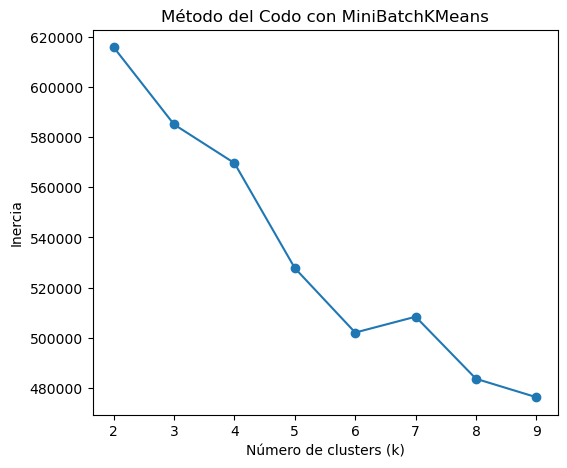

In [28]:
from sklearn.cluster import MiniBatchKMeans

# Definir un rango de valores de k a probar
rango_k = range(2, 10)  # Probamos de 2 a 10 clusters

# Reiniciar la lista de inercias
inercias = []

# Aplicar MiniBatchKMeans en diferentes valores de k
for k in rango_k:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256, n_init=10)
    mini_kmeans.fit(df)
    inercias.append(mini_kmeans.inertia_)

# Graficar el método del codo con MiniBatchKMeans
plt.figure(figsize=(6, 5))
plt.plot(rango_k, inercias, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con MiniBatchKMeans')
plt.show()

In [29]:
# Calcular la diferencia de inercias entre cada k para detectar el "codo"
diferencias = np.diff(inercias)

# Encontrar el índice donde la diferencia cambia más bruscamente
k_optimo = rango_k[np.argmin(diferencias) + 1]  # +1 porque np.diff reduce el tamaño en 1

k_optimo

5

In [30]:
# Aplicar MiniBatchKMeans con k=5
kmeans_final = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=256, n_init=10)
df['cluster'] = kmeans_final.fit_predict(df)

# Mostrar el resumen de la asignación de clusters
resumen_clusters = df['cluster'].value_counts().sort_index()

# Visualizar los datos con los clusters asignados
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency,cluster
0,-0.23,1.79,1.77,1.23,1.76,-0.46,0.36,1.05,-0.34,0.19,0.86,-0.84,-0.30,-0.48,-0.39,0.21,-0.03,-0.22,-0.46,-0.02,-0.07,1.69,-0.16,-0.03,-0.18,-0.19,0.67,-0.35,-0.48,-0.10,-0.25,-0.23,-0.29,1.74,-0.07,-0.18,-0.46,-0.28,-0.97,-0.40,-1.68,-1.46,-0.37,-0.40,-0.92,-1.13,0.87,-1.72,-0.56,-1.93,-1.70,-1.63,-1.21,-1.28,-1.51,0.31,-0.20,-0.36,-0.20,0.49,-1.69,-0.35,-0.95,-0.99,-1.08,-1.07,0.05,-0.35,-0.25,-0.11,-1.56,-0.85,1
1,0.03,0.90,-0.66,-0.32,-0.71,2.38,0.36,-0.91,3.03,-0.26,-0.59,-0.06,-0.30,-0.48,-0.39,0.21,1.07,-0.22,1.86,-0.02,-0.07,-0.58,-0.16,-0.03,-0.18,-0.19,-1.38,-0.35,2.09,-0.10,-0.25,-0.23,-0.29,1.74,-0.07,-0.18,2.38,0.11,0.76,-0.38,0.45,0.34,-0.37,-0.40,-0.56,1.20,-0.47,0.06,-1.01,-0.53,1.78,1.10,1.67,1.87,1.67,-0.32,-0.20,-0.36,-0.20,0.49,1.01,0.60,0.83,1.35,1.44,-0.54,-0.37,0.58,-0.25,2.22,1.77,2.19,2
2,-0.20,0.90,-0.66,-0.32,-0.71,-0.46,0.36,0.40,-0.34,2.47,0.13,-0.06,-0.30,-0.48,-0.39,0.21,-0.03,-0.22,-0.46,-0.02,-0.07,1.69,-0.16,-0.03,-0.18,-0.19,-1.38,-0.35,-0.48,-0.10,-0.25,-0.23,-0.29,-0.57,-0.07,-0.18,-0.46,0.11,0.76,-0.38,0.45,0.34,-0.37,-0.40,-0.56,1.20,-0.47,0.06,-1.01,-0.53,1.78,1.10,1.67,1.87,1.67,-0.32,-0.20,-0.36,-0.20,0.49,1.01,0.43,0.83,1.35,1.44,-0.54,0.05,-0.30,-0.25,-0.11,1.77,2.19,2
3,0.82,0.73,-0.84,-0.13,-0.79,-0.46,0.36,2.36,3.03,-1.17,0.86,2.30,3.33,-0.48,-0.39,0.21,1.07,-0.22,-0.46,-0.02,-0.07,1.69,-0.16,-0.03,-0.18,-0.19,-0.46,2.63,-0.48,-0.10,3.98,-0.23,-0.29,1.74,1.72,-0.18,-0.46,-1.48,-1.26,-0.42,-0.40,-1.04,-0.37,-1.03,-1.18,0.62,-0.02,-1.17,-1.04,-1.78,-1.13,-1.21,-0.69,-0.80,-0.94,-0.02,-0.20,-0.36,-0.20,0.49,1.01,4.47,2.54,0.77,2.29,-1.30,1.71,0.17,-0.25,1.06,-1.02,-0.55,3
4,0.45,1.08,2.12,1.25,1.92,-0.46,-3.57,0.40,-0.34,1.56,0.86,-0.06,-0.30,-0.48,-0.39,0.21,-0.03,-0.22,-0.46,-0.02,-0.07,-0.58,-0.16,-0.03,-0.18,-0.19,1.03,-0.35,-0.48,-0.10,-0.25,-0.23,-0.29,-0.57,-0.07,-0.18,-0.46,0.06,0.15,-0.33,-0.83,-0.77,-0.37,-1.03,0.59,-0.87,0.95,-1.09,-0.09,-0.82,0.42,0.29,-0.03,-0.15,0.40,-0.14,-0.20,-0.36,-0.20,0.49,-0.34,-0.04,-0.81,-0.30,-0.94,0.49,0.46,0.50,-0.25,-0.70,0.18,-0.37,4


### 5.1.2. Visualización e interpretación
- Análisis de características
- Validación de la calidad de los Clusters
- Aplicación del resultado a la problemática

In [31]:
df.shape

(9864, 73)

In [32]:
df_original.shape

(9864, 72)

In [33]:
# Sumar la columna cluster al 'df_original'
df_final = df_original.join(df[['cluster']])

df_final.shape

(9864, 73)

In [34]:
df_final.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency,cluster
0,104.00,Villa De Vallecas,18,Santa Eugenia,182,0,Piso,3,0.00,3.00,4.00,1.00,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28031,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,23876.00,139.00,2.00,1.00,5.00,0.00,1.00,158.00,17346.00,2.61,12370.00,27.00,11.00,0.00,0.00,0.00,0.00,0.00,2681389.00,0,0,0,1.00,1,329900.00,234038.64,249993.47,2749.72,164.00,5.00,20.80,1,4.00,0.00,44.00,1
1,144.00,Salamanca,4,Goya,42,4,Piso,0,1.00,2.00,2.00,2.00,0,0,0,1,mas_50,0,lujo,0,0,1,0,0,0,1,28001,Desconocido,1,0,0,0,0,Normal,Desconocido,0,4,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1354900.00,1454144.60,1752995.20,10005.31,205.00,4.00,36.00,1,8.00,7681.00,338.00,2
2,108.00,Salamanca,4,Goya,42,0,Piso,2,0.00,8.00,3.00,2.00,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28001,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1175000.00,1454144.60,1752995.20,10005.31,205.00,5.00,21.60,1,4.00,7681.00,338.00,2
3,264.00,Retiro,3,Jerónimos,35,0,Piso,5,1.00,0.00,4.00,5.00,1,0,0,1,mas_50,0,Desconocido,0,0,2,0,0,0,1,28014,Madera,0,0,1,0,0,Normal,Equipada,0,0,6825.00,82.00,0.00,4.00,8.00,0.00,0.00,138.00,33396.00,2.39,16179.00,10.00,13.00,408.00,160.00,169.00,349.00,164.00,1427833.00,0,0,0,1.00,5,5500000.00,2618438.20,1378643.60,12463.88,146.00,9.00,29.33,1,6.00,1250.00,73.00,3
4,208.00,San Blas-Canillejas,20,Simancas,201,0,Atico,2,0.00,6.00,4.00,2.00,0,0,0,1,Desconocido,0,Desconocido,0,0,1,0,0,0,1,28037,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,28765.00,358.00,9.00,3.00,10.00,0.00,0.00,275.00,19768.00,2.63,16710.00,44.00,26.00,1504.00,739.00,381.00,828.00,552.00,995950.00,0,0,0,1.00,3,667000.00,332507.66,691500.00,3150.77,285.00,6.00,34.67,1,3.00,4004.00,90.00,4


In [35]:
# Identificar los tipos de datos en el dataset
tipos_df_final = df_final.dtypes.value_counts()

print(f"El DataFrame 'df_final' tiene los siguientes tipos de datos:\n{tipos_df_final}.")

El DataFrame 'df_final' tiene los siguientes tipos de datos:
float64    35
int64      29
object      8
int32       1
Name: count, dtype: int64.


In [36]:
# Seleccionar las variables numéricas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df_final[numeric_cols]

# Calcular las características promedio de cada cluster
resumen_clusters = df_numeric.groupby('cluster').mean()

# Visualizar los resultados
resumen_clusters

,m2_constr,cod_distrito,cod_barrio,letra_ce,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,269.70,9.59,99.36,0.89,1.47,0.04,2.33,3.82,2.90,0.07,0.34,0.26,0.97,0.32,0.00,0.02,1.24,0.18,0.00,0.03,1.16,28033.44,0.24,0.01,0.08,0.08,0.13,0.05,0.89,24923.06,225.71,47.24,4.28,13.69,2.07,2.98,363.52,32669.79,2.60,19786.95,39.13,47.12,565.22,257.93,272.93,449.98,232.09,7376514.52,0.04,0.27,0.32,0.99,4.36,1038582.15,1105112.59,1167957.34,4749.96,382.25,6.72,34.72,2.11,4.42,1778.15,80.19
1,86.86,15.10,153.33,0.62,1.69,0.05,2.41,2.53,1.47,0.05,0.16,0.16,0.94,0.07,0.00,0.00,1.32,0.04,0.00,0.02,1.09,28031.22,0.18,0.01,0.05,0.04,0.05,0.03,0.61,32343.53,342.18,118.72,1.83,5.52,0.00,2.38,216.92,16343.58,2.68,16586.62,70.14,28.59,472.09,187.19,111.22,241.94,175.77,1342399.86,0.06,0.38,0.20,0.95,1.55,194775.34,253276.57,280207.54,2769.27,224.83,4.00,22.06,1.39,4.08,1188.21,52.72
2,167.83,4.86,51.81,0.67,1.43,0.16,2.97,2.98,2.62,0.12,0.19,0.12,0.99,0.02,0.00,0.00,1.26,0.01,0.00,0.05,1.14,28007.23,0.19,0.02,0.06,0.06,0.08,0.03,0.67,22630.57,318.12,13.14,6.86,19.13,0.00,0.71,175.95,38193.84,2.26,25003.14,14.00,32.57,2313.00,1068.46,958.39,2197.34,912.66,243779.13,0.05,0.19,0.37,0.96,4.83,1316313.24,1637652.96,1645931.70,9505.72,195.79,5.60,29.00,1.30,4.41,7449.85,201.36
3,132.46,2.00,25.11,0.55,1.15,0.16,2.55,2.69,2.20,0.12,0.15,0.10,0.95,0.04,0.00,0.01,1.22,0.00,0.00,0.05,1.08,28011.52,0.16,0.01,0.06,0.04,0.07,0.03,0.55,23482.57,339.58,14.95,6.61,23.21,0.00,1.56,192.81,30730.39,2.13,29283.34,36.71,42.86,1010.28,793.89,158.89,539.74,240.32,377045.17,0.03,0.23,0.23,0.34,4.33,797854.02,1049553.83,1003918.75,7349.95,217.59,4.88,26.83,0.63,4.13,2743.12,195.56
4,88.10,10.62,109.96,0.63,1.38,0.04,2.48,2.49,1.45,0.04,0.18,0.10,0.95,0.05,0.00,0.00,1.26,0.01,0.00,0.02,1.06,28030.53,0.19,0.01,0.06,0.05,0.08,0.03,0.63,35471.34,371.19,40.03,3.97,12.19,0.67,1.33,253.00,20638.20,2.49,26028.10,75.40,35.78,1285.12,561.82,389.77,984.95,508.05,902696.36,0.06,0.29,0.11,0.95,2.35,269596.83,369419.67,370296.23,3789.68,267.19,3.95,22.71,1.28,4.02,3729.72,60.33


In [ ]:
# Analizar la cantidad de viviendas por clusters por barrio
viviendas_x_barrio_y_cluster = (df_final.groupby("barrio")["cluster"].value_counts().unstack(fill_value=0))  # Más eficiente que fillna(0)

# Display results
viviendas_x_barrio_y_cluster


cluster,0,1,2,3,4
barrio,,,,,
Abrantes,0,2,0,0,70
Acacias,1,0,0,1,57
Adelfas,8,9,0,5,5
Aeropuerto,0,7,0,0,0
Alameda De Osuna,3,20,0,0,0
...,...,...,...,...,...
Ventas,0,0,0,0,62
Villaverde Alto,0,98,0,0,0
Vinateros,0,16,0,0,0


In [66]:
num_barrios = df_final['barrio'].nunique()
print(f"Cantidad de barrios únicos: {num_barrios}")

Cantidad de barrios únicos: 131


In [ ]:
# Lista de barrios en cada Cluster
for cluster in sorted(df_final['cluster'].unique()):
    barrios = df_final[df_final['cluster'] == cluster]['barrio'].unique()
    count = len(barrios)
    print(f"\nCluster {cluster} ({count} barrios):")
    print(barrios)


Cluster 0 (54 barrios):
['Casa De Campo' 'Aravaca' 'El Viso' 'Canillas' 'Palomas' 'Adelfas'
 'Valdefuentes' 'Valdemarín' 'Argüelles' 'El Pardo' 'Ciudad Universitaria'
 'Peñagrande' 'Nueva España' 'Mirasierra' 'Hispanoamérica' 'Castilla'
 'Valverde' 'Corralejo' 'El Plantío' 'Valdezarza' 'Atalaya' 'Recoletos'
 'Costillares' 'Pilar' 'Piovera' 'Colina' 'Prosperidad' 'Apostol Santiago'
 'Fuentelarreina' 'Cuatro Vientos' 'Legazpi' 'Canillejas' 'Pinar Del Rey'
 'Jerónimos' 'Ciudad Jardín' 'La Paz' 'Concepción' 'Salvador'
 'Los Cármenes' 'Campamento' 'Alameda De Osuna' 'Las Águilas' 'Estrella'
 'Puerta Del Ángel' 'San Pascual' 'Timón' 'Acacias' 'Rejas' 'El Goloso'
 'San Juan Bautista' 'Simancas' 'Ibiza' 'Bellas Vistas' 'Arcos']

Cluster 1 (50 barrios):
['Santa Eugenia' 'Numancia' 'Orcasitas' 'Almendrales' 'Los Ángeles'
 'Ensanche De Vallecas' 'San Diego' 'Marroquina' 'Los Rosales'
 'Palomeras Bajas' 'El Cañaveral' 'Casco Histórico De Vallecas'
 'Villaverde Alto' 'Orcasur' 'Casco Histórico De 

In [ ]:
# Ordenar por la cantidad de barrios en cada cluster
ranking_barrios = viviendas_x_barrio_y_cluster.idxmax(axis=1).value_counts()

# Crear un dataframe con el ranking de barrios según el Cluster
ranking_barrios_df = pd.DataFrame({'Cluster Dominante': ranking_barrios.index, 'Cantidad de Barrios': ranking_barrios.values})

# Visualizar los resultados
ranking_barrios_df

,Cluster Dominante,Cantidad de Barrios
0,4,43
1,1,39
2,0,22
3,3,15
4,2,12


/var/folders/t0/kf4ls9ss5b12r0bynt2jdwgm0000gn/T/ipykernel_32910/1978533382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_barrios_df["Cluster Dominante"], y=ranking_barrios_df["Cantidad de Barrios"], palette="viridis")


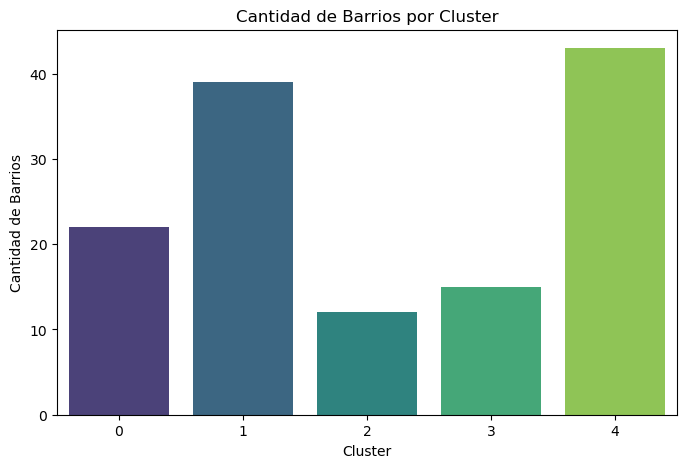

In [45]:
# Crear gráfico de barras de la cantidad de barrios por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=ranking_barrios_df["Cluster Dominante"], y=ranking_barrios_df["Cantidad de Barrios"], palette="viridis")

# Etiquetas y título
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Barrios")
plt.title("Cantidad de Barrios por Cluster")

# Mostrar el gráfico
plt.show()

In [76]:
# Valores promedio para cada variable numérica en cada Cluster
cluster_means = df_numeric.groupby('cluster').mean()
print(cluster_means)

         m2_constr  cod_distrito  cod_barrio  letra_ce  estado  amueblado  \
cluster                                                                     
0           269.70          9.59       99.36      0.89    1.47       0.04   
1            86.86         15.10      153.33      0.62    1.69       0.05   
2           167.83          4.86       51.81      0.67    1.43       0.16   
3           132.46          2.00       25.11      0.55    1.15       0.16   
4            88.10         10.62      109.96      0.63    1.38       0.04   

         planta  dormitorios  banos  balcon  terraza  trastero  ascensor  \
cluster                                                                    
0          2.33         3.82   2.90    0.07     0.34      0.26      0.97   
1          2.41         2.53   1.47    0.05     0.16      0.16      0.94   
2          2.97         2.98   2.62    0.12     0.19      0.12      0.99   
3          2.55         2.69   2.20    0.12     0.15      0.10      0.95   
4   

In [77]:
# Estadísticas de las variables por cluster
for cluster in sorted(df_final['cluster'].unique()):
    print(f"\nCluster {cluster} Characteristics:")
    cluster_data = df_final[df_final['cluster'] == cluster]
    
    # Number of samples in cluster
    print(f"Number of samples: {len(cluster_data)}")
    
    # Numeric variables summary
    numeric_cols = cluster_data.select_dtypes(include=[np.number]).columns
    print("\nNumeric Variables Summary:")
    print(cluster_data[numeric_cols].describe())
    
    # Categorical variables summary (if any)
    cat_cols = cluster_data.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        print("\nCategorical Variables Most Common Values:")
        for col in cat_cols:
            print(f"\n{col}:")
            print(cluster_data[col].value_counts().head())
    
    print("-" * 70)


Cluster 0 Characteristics:
Number of samples: 1232

Numeric Variables Summary:
       m2_constr  cod_distrito  cod_barrio  letra_ce  estado  amueblado  \
count    1232.00       1232.00     1232.00   1232.00 1232.00    1232.00   
mean      269.70          9.59       99.36      0.89    1.47       0.04   
std       325.55          3.68       37.26      1.66    1.60       0.19   
min        21.00          2.00       22.00      0.00    0.00       0.00   
25%        90.00          8.00       81.00      0.00    0.00       0.00   
50%       153.50          9.00       92.00      0.00    1.00       0.00   
75%       326.50          9.00       97.00      1.00    2.00       0.00   
max      4574.00         21.00      215.00      7.00    5.00       1.00   

       planta  dormitorios   banos  balcon  terraza  trastero  ascensor  \
count 1232.00      1232.00 1232.00 1232.00  1232.00   1232.00   1232.00   
mean     2.33         3.82    2.90    0.07     0.34      0.26      0.97   
std      2.61      

In [93]:
cluster_stats_viv_nuevas_transacciones = df_final.groupby('cluster')['viv_nuevas_transacciones'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas del viv_nuevas_transacciones por cluster:\n")
print(cluster_stats_viv_nuevas_transacciones)


Estadísticas del viv_nuevas_transacciones por cluster:

          mean  median    std  min     max
cluster                                   
0        47.24   10.00  75.94 0.00  506.00
1       118.72   47.00 204.78 0.00 1068.00
2        13.14    4.00  18.59 0.00   71.00
3        14.95    9.00  16.79 0.00  399.00
4        40.03   23.00  60.79 0.00  399.00


In [92]:
cluster_stats_total_transacciones = df_final.groupby('cluster')['total_transacciones'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas del total_transacciones por cluster:\n")
print(cluster_stats_total_transacciones)


Estadísticas del total_transacciones por cluster:

          mean  median    std    min     max
cluster                                     
0       225.71  200.00 179.72  17.00  694.00
1       342.18  316.00 262.03   7.00 1085.00
2       318.12  257.00 114.18 180.00  613.00
3       339.58  258.00 210.98   5.00  774.00
4       371.19  351.00 170.89   5.00  774.00


In [91]:
cluster_stats_euro_m2_barrio = df_final.groupby('cluster')["euro_m2_barrio"].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas del euro_m2_barrio por cluster:\n")
print(cluster_stats_euro_m2_barrio)


Estadísticas del euro_m2_barrio por cluster:

           mean   median     std     min      max
cluster                                          
0       4749.96  4488.38 1183.30 2547.33 12463.88
1       2769.27  2575.28  793.68 1690.13 10544.30
2       9505.72 10005.31 2051.34 5437.01 11892.91
3       7349.95  6801.23 1658.98 2168.80 12463.88
4       3789.68  3332.46 1111.56 2440.30 10544.30


In [85]:
cluster_stats_precio = df_final.groupby('cluster')['target'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas del precio por cluster:\n")
print(cluster_stats_precio)


Estadísticas del precio por cluster:

              mean    median        std  min         max
cluster                                                 
0       1038582.15 650000.00 1306209.22 0.00 11500000.00
1        194775.34 169000.00  171468.09 0.00  1650000.00
2       1316313.24 990000.00 1466847.80 0.00 19950000.00
3        797854.02 560000.00 1034426.01 0.00 13900000.00
4        269596.83 220000.00  274803.85 0.00  2790000.00


In [82]:
cluster_stats_m2_constr = df_final.groupby('cluster')['m2_constr'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas de metros cuadrados construidos por cluster:\n")
print(cluster_stats_m2_constr)


Estadísticas de metros cuadrados construidos por cluster:

          mean  median    std   min     max
cluster                                    
0       269.70  153.50 325.55 21.00 4574.00
1        86.86   77.00  43.11 18.00  500.00
2       167.83  137.00 114.41 17.00 1200.00
3       132.46  107.00 108.96 10.00 1800.00
4        88.10   75.00  50.16 13.00  500.00


In [86]:
cluster_stats_renta = df_final.groupby('cluster')['renta_bruta_media_por_persona'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas de renta bruta media por persona por cluster:\n")
print(cluster_stats_renta)


Estadísticas de renta bruta media por persona por cluster:

            mean   median     std      min      max
cluster                                            
0       32669.79 29047.00 5513.73 13481.00 42678.00
1       16343.58 13604.00 4757.95 13354.00 33396.00
2       38193.84 38751.00 1111.96 22890.00 38751.00
3       30730.39 27030.00 6059.88 22890.00 42678.00
4       20638.20 19768.00 4401.00 13481.00 42678.00


In [87]:
cluster_stats_habitaciones = df_final.groupby('cluster')['habitaciones'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas de habitaciones por cluster:\n")
print(cluster_stats_habitaciones)


Estadísticas de habitaciones por cluster:

         mean  median  std  min   max
cluster                              
0        6.72    6.00 3.55 1.00 22.00
1        4.00    4.00 1.34 1.00 12.00
2        5.60    5.00 2.29 1.00 24.00
3        4.88    4.00 2.31 1.00 20.00
4        3.95    4.00 1.49 1.00 13.00


In [88]:
cluster_stats_banos = df_final.groupby('cluster')['banos'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas de baños por cluster:\n")
print(cluster_stats_banos)


Estadísticas de baños por cluster:

         mean  median  std  min   max
cluster                              
0        2.90    2.00 1.84 1.00 13.00
1        1.47    1.00 0.59 1.00  5.00
2        2.62    2.00 1.27 1.00 12.00
3        2.20    2.00 1.21 1.00 11.00
4        1.45    1.00 0.70 1.00  7.00


In [90]:
# Porcentaje de comparación
def cluster_profile(df, cluster_col='cluster'):
    profile = pd.DataFrame()
    
    # Calcular promedio global
    promedio_global = df_numeric.mean(numeric_only=True)
    
    for cluster in sorted(df_numeric[cluster_col].unique()):
        cluster_data = df_numeric[df_numeric[cluster_col] == cluster]
        cluster_mean = cluster_data.mean(numeric_only=True)
        
        # Calculate percentage difference from overall mean
        pct_diff = ((cluster_mean - promedio_global) / promedio_global * 100)
        profile[f'Cluster {cluster}'] = pct_diff
    
    return profile

profile = cluster_profile(df_final)
print("\nPorcentaje de diferencia de promedio global:\n")
print(profile)


Porcentaje de diferencia de promedio global:

                               Cluster 0  Cluster 1  Cluster 2  Cluster 3  \
m2_constr                          94.38     -37.39      20.96      -4.53   
cod_distrito                       22.64      93.13     -37.83     -74.39   
cod_barrio                         21.32      87.23     -36.73     -69.34   
letra_ce                           36.74      -5.51       3.51     -14.94   
estado                              5.37      21.14       2.42     -17.36   
amueblado                         -58.92     -46.70      62.95      63.28   
planta                             -9.62      -6.19      15.51      -0.84   
dormitorios                        35.69     -10.29       5.69      -4.60   
banos                              39.78     -28.96      26.49       5.91   
balcon                            -16.50     -44.48      49.11      40.04   
terraza                            76.78     -14.09       2.14     -22.81   
trastero                     

In [105]:
# Comprehensive cluster comparison
for cluster in sorted(df_final['cluster'].unique()):
    cluster_data = df_final[df_final['cluster'] == cluster]
    
    print(f"\n=== Cluster {cluster} Profile ===")
    print(f"Size: {len(cluster_data)} samples ({len(cluster_data)/len(df_final)*100:.1f}% of total)")
    
    # Numeric variables summary
    print("\nKey Metrics:")
    numeric_cols = cluster_data.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'cluster']  # exclude cluster column
    
    cluster_stats = cluster_data[numeric_cols].agg(['mean', 'min', 'max']).round(2)
    
    for col in numeric_cols:
        print(f"{col}:")
        print(f"  Mean: {cluster_stats.loc['mean', col]:.2f}")
        print(f"  Min:  {cluster_stats.loc['min', col]:.2f}")
        print(f"  Max:  {cluster_stats.loc['max', col]:.2f}")
        
    print("-" * 50)



=== Cluster 0 Profile ===
Size: 1232 samples (12.5% of total)

Key Metrics:
m2_constr:
  Mean: 269.70
  Min:  21.00
  Max:  4574.00
cod_distrito:
  Mean: 9.59
  Min:  2.00
  Max:  21.00
cod_barrio:
  Mean: 99.36
  Min:  22.00
  Max:  215.00
letra_ce:
  Mean: 0.89
  Min:  0.00
  Max:  7.00
estado:
  Mean: 1.47
  Min:  0.00
  Max:  5.00
amueblado:
  Mean: 0.04
  Min:  0.00
  Max:  1.00
planta:
  Mean: 2.33
  Min:  0.00
  Max:  22.00
dormitorios:
  Mean: 3.82
  Min:  0.00
  Max:  15.00
banos:
  Mean: 2.90
  Min:  1.00
  Max:  13.00
balcon:
  Mean: 0.07
  Min:  0.00
  Max:  1.00
terraza:
  Mean: 0.34
  Min:  0.00
  Max:  1.00
trastero:
  Mean: 0.26
  Min:  0.00
  Max:  1.00
ascensor:
  Mean: 0.97
  Min:  0.00
  Max:  1.00
jardin:
  Mean: 0.32
  Min:  0.00
  Max:  2.00
cancha_tenis:
  Mean: 0.00
  Min:  0.00
  Max:  1.00
chimenea:
  Mean: 0.02
  Min:  0.00
  Max:  1.00
exterior:
  Mean: 1.24
  Min:  0.00
  Max:  2.00
piscina:
  Mean: 0.18
  Min:  0.00
  Max:  2.00
porton_electrico:
  Mean:

In [104]:
# Even more detailed cluster comparison
for cluster in sorted(df_final['cluster'].unique()):
    cluster_data = df_final[df_final['cluster'] == cluster]
    
    print(f"\n=== Cluster {cluster} Profile ===")
    print(f"Size: {len(cluster_data)} samples ({len(cluster_data)/len(df_final)*100:.1f}% of total)")
    
    # Numeric variables summary
    print("\nKey Metrics:")
    numeric_cols = cluster_data.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'cluster']
    
    cluster_stats = cluster_data[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
    
    for col in numeric_cols:
        print(f"\n{col}:")
        print(f"  Mean:   {cluster_stats.loc['mean', col]:.2f}")
        print(f"  Median: {cluster_stats.loc['median', col]:.2f}")
        print(f"  Std:    {cluster_stats.loc['std', col]:.2f}")
        print(f"  Min:    {cluster_stats.loc['min', col]:.2f}")
        print(f"  Max:    {cluster_stats.loc['max', col]:.2f}")
        
    print("-" * 50)



=== Cluster 0 Profile ===
Size: 1232 samples (12.5% of total)

Key Metrics:

m2_constr:
  Mean:   269.70
  Median: 153.50
  Std:    325.55
  Min:    21.00
  Max:    4574.00

cod_distrito:
  Mean:   9.59
  Median: 9.00
  Std:    3.68
  Min:    2.00
  Max:    21.00

cod_barrio:
  Mean:   99.36
  Median: 92.00
  Std:    37.26
  Min:    22.00
  Max:    215.00

letra_ce:
  Mean:   0.89
  Median: 0.00
  Std:    1.66
  Min:    0.00
  Max:    7.00

estado:
  Mean:   1.47
  Median: 1.00
  Std:    1.60
  Min:    0.00
  Max:    5.00

amueblado:
  Mean:   0.04
  Median: 0.00
  Std:    0.19
  Min:    0.00
  Max:    1.00

planta:
  Mean:   2.33
  Median: 2.00
  Std:    2.61
  Min:    0.00
  Max:    22.00

dormitorios:
  Mean:   3.82
  Median: 3.00
  Std:    1.94
  Min:    0.00
  Max:    15.00

banos:
  Mean:   2.90
  Median: 2.00
  Std:    1.84
  Min:    1.00
  Max:    13.00

balcon:
  Mean:   0.07
  Median: 0.00
  Std:    0.25
  Min:    0.00
  Max:    1.00

terraza:
  Mean:   0.34
  Median: 0.00
 

## *5.2. K-Means*

In [97]:
def plot_clusters(**kwargs):
    fig = px.scatter(**kwargs)
    fig.update_traces(
        marker=dict(size=12, line=dict(width=2, color="DarkSlateGrey")),
        selector=dict(mode="markers"),
    )
    fig.show()

In [98]:
plot_clusters(
    data_frame=df,
    x="m2_constr",
    y="target",
    title="Distribución de precio por metro cuadrado construido",
    width=1200,
    height=800,
)

In [99]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42, init="random", n_init="auto")

kmeans.fit(df)

preds = kmeans.predict(df)

cluster_labels = [f"Cluster {p}" for p in preds]
color_map = {"Cluster 0": "red", "Cluster 1": "green", "Cluster 2": "blue", "Cluster 3": "orange", "Cluster 4": "yellow"}

plot_clusters(
    data_frame=df,
    x="m2_constr",
    y="target",
    color=cluster_labels,
    title="Distribución de precio por metro cuadrado construido (con clusters)",
    width=1200,
    height=800,
    color_discrete_map=color_map,
)

In [101]:
df_centers = pd.DataFrame(
    data=kmeans.cluster_centers_,
    columns=df.columns,
)

plot_clusters(
    data_frame=df_centers,
    x="m2_constr",
    y="target",
    color_discrete_map=color_map, 
    title="Cluster centers",
    width=1200,
    height=800,
    color=[f"Cluster {i}" for i in df_centers.index],
)

## *5.3. PCA*

## *5.4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*
- Útil cuando hay clusters de forma irregular o con ruido.
- No requiere definir el número de clusters, pero es sensible a los parámetros eps y min_samples.

## *5.5. Comparación de métodos*